## REMOVED PEICES OF SHALLOWWATER CODE, REQUIRES FRAMEWORK

In [11]:


class caribbean(): # environment modeled after caribbean
    size = (100, 100) # grid squares (dx)
    
    dx = np.single(100, dtype=np.float32) # meters
    dy = np.single(100, dtype=np.float32) # meters
    lat = np.linspace(13, 22, size[0]+1)
    lon = np.linspace(-88, -72, size[1]+1)
    
    
    bath = nc.Dataset('../data/bathymetry.nc','r')
    latin = np.linspace(13500, 12500, size[1], dtype=int)
    lonin = np.linspace(12000, 13000, size[0], dtype=int) # indexes of the bathymetry dataset we need
    h = np.asarray(-bath.variables['elevation'][latin, lonin], dtype=np.float32)
    
    n = 1*planegauss(size, ((-10, 10), (-10, 10))) # intial condition wave
    u = np.zeros((size[0]+1, size[1]+0)) # global x vel array
    v = np.zeros((size[0]+0, size[1]+1)) # global y vel array

# caribbean = {
#     'h': np.asarray(-nc.Dataset('../data/bathymetry.nc','r').variables['elevation'][np.linspace(13500, 12500, size[1], dtype=int), np.linspace(12000, 13000, size[0], dtype=int)], dtype=np.float32),
#     'n': 1*planegauss(size, ((-10, 10), (-10, 10))),
#     'u': np.zeros((size[0]+1, size[1]+0)),
#     'v': np.zeros((size[0]+0, size[1]+1)),
#     'dx': np.single(100, dtype=np.float32),
#     'dy': np.single(100, dtype=np.float32),
#     'lat': np.linspace(13, 22, size[0]+1),
#     'lon': np.linspace(-88, -72, size[1]+1) 
# }

carib = State(*(props(vars(caribbean))))

<IPython.core.display.Javascript object>


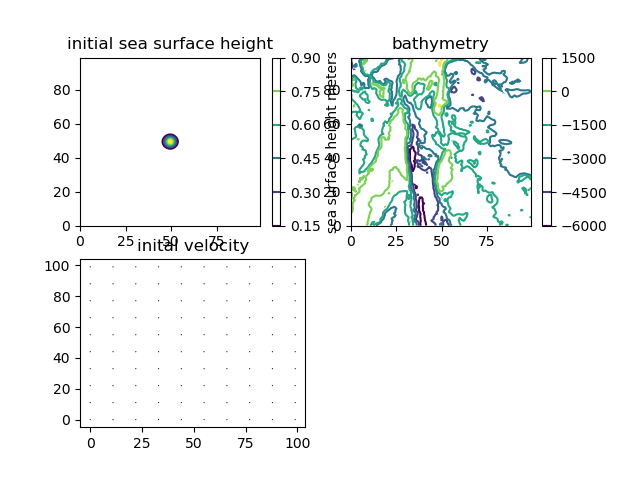

In [46]:
#display initial conditions, tests display functions
plt.figure(42)

plt.subplot(221)
a1 = plt.contour(qp.asnumpy(carib.n.T))
tt1 = plt.title('initial sea surface height')
cb1 = plt.colorbar()
cb1.set_label('sea surface height meters')

plt.subplot(222)
a2 = plt.contour(-qp.asnumpy(carib.h.T))
tt2 = plt.title('bathymetry')
cb2 = plt.colorbar()

plt.subplot(223)
a3 = vect(d_dx(carib.u, carib.dx), d_dy(carib.v, carib.dy))
tt3 = plt.title('inital velocity')

In [12]:
nsim = simulate(carib, 50, 100)
ntime, nmax, nmin = nsim[:3] # simulate a system, taking every 100th frame/dt image

simulated 50 seconds


<IPython.core.display.Javascript object>


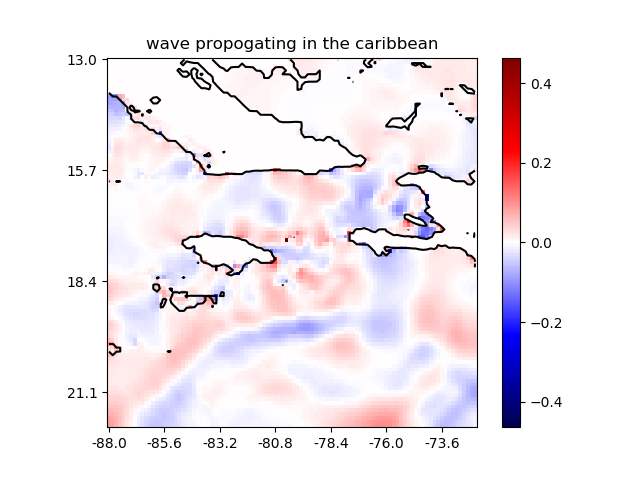

In [13]:
fig = plt.figure(50)
f = genframes(ntime, frames=np.linspace(0, ntime.shape[0]-1, 120))
cb = plt.colorbar()
plt.contour(qp.asnumpy(carib.h)-20, levels=3, colors='black')
xtickf = 15
ytickf = 30
plt.xticks(np.arange(0, qp.asnumpy(carib.lon).shape[0], xtickf), qp.asnumpy(carib.lon)[::xtickf])
plt.yticks(np.arange(0, qp.asnumpy(carib.lat).shape[0], ytickf), qp.asnumpy(carib.lat)[::ytickf])
plt.title('wave propogating in the caribbean')
anim = animation.ArtistAnimation(fig, f)
# anim = motioncon(f, qp.asnumpy(carib.h)-5, 'Sea Surface Height (m)', carib.lon[::20], carib.lat[::10]) # display as an animation
# anim.save('../results/caribgauss2.mp4')

import timeit
# calculate effeciency
#outdated
def ploteff(sizes):
    timelist = np.array([])
    for size in sizes:
        dx = int(10000/size)
        shape = (size, size)
        tstate = State(dx, dx, np.arange(2), np.arange(2), 100, planegauss(shape), np.zeros((shape[0]+1, shape[1]+0)), np.zeros((shape[0]+0, shape[1]+1)))
        def dosim(): simulate(tstate, 100)
        timelist = np.append(timelist, timeit.timeit(dosim, number=3))
    return timelist
lens = np.arange(1, 301, 10, dtype=int)
eff = ploteff(lens)

# effeciency plot
plt.figure(6)
plt.plot(lens**2, eff)
plt.title('simulation time required for grid size')
plt.xlabel('grid cell length')
plt.ylabel('simulation time (seconds)')
plt.ylim(0, 5)
plt.show()
plt.savefig('../results/effeciency1.png')

In [14]:
class caribbp():
    dlat = 111000 # latitude degree to meters
    psize = (dlat*15, dlat*30*np.cos(22.5*np.pi/180)) # physical size of area
    size = (500, 250) # grid squares (dx)
    
    dx = np.single(psize[0]/size[0], dtype=np.float32) # meters
    dy = np.single(psize[1]/size[1], dtype=np.float32) # meters
    lat = np.linspace(15, 30, size[0]+1)
    lon = np.linspace(-100, -70, size[1]+1)
    
    bath = nc.Dataset('../data/bathymetry.nc','r')
    latin = np.linspace(12600, 14400, size[1], dtype=int)
    lonin = np.linspace(9600, 13200, size[0], dtype=int) # indexes of the bathymetry dataset we need
    h = np.asarray(-bath.variables['elevation'][latin, lonin], dtype=np.float32).T
    
#     n = np.zeros(size)
    n = 1*planegauss(size, ((-10, 10), (-10, 10))) # intial condition wave
    u = np.zeros((size[0]+1, size[1]+0)) # global x vel array
    v = np.zeros((size[0]+0, size[1]+1)) # global y vel array


carib2 = State(*(props(vars(caribbp))))

<IPython.core.display.Javascript object>


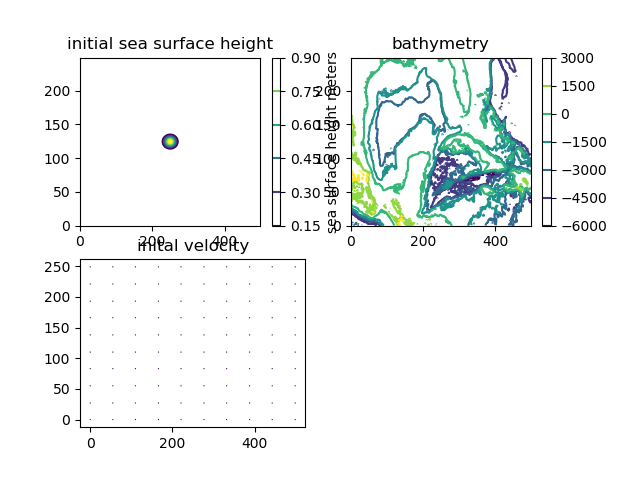

In [15]:
plt.figure(80)

plt.subplot(221)
a1 = plt.contour(qp.asnumpy(carib2.n.T))
tt1 = plt.title('initial sea surface height')
cb1 = plt.colorbar()
cb1.set_label('sea surface height meters')

plt.subplot(222)
a2 = plt.contour(-qp.asnumpy(carib2.h.T))
tt2 = plt.title('bathymetry')
cb2 = plt.colorbar()

plt.subplot(223)
a3 = vect(d_dx(carib2.u, carib2.dx), d_dy(carib2.v, carib2.dy))
tt3 = plt.title('inital velocity')

In [16]:
carib2sim = simulate(carib2, 500, 250)
nt, nmax, nmax = carib2sim[:3]

simulated 500 seconds


In [ ]:
fig = plt.figure(90)
a = np.transpose(nt, (0, 2, 1))[:,::-1]
f = genframes(a, frames=np.linspace(0, a.shape[0]-1, 120, dtype=int))
cb = plt.colorbar()
anim = animation.ArtistAnimation(fig, f)
h = np.transpose(qp.asnumpy(carib2.h), (1, 0))[::-1,:]
h = plt.contour(h-20, colors='black', levels=1)

In [17]:
# modeling historic events
def tofloat(str):
    try:
        out = float(str)
    except(ValueError):
        out = None
    return out

se = {}
with open('../data/sourceevents.txt', 'r') as sourceev:
    lines = sourceev.read().split('\n')[:-1]
    for line in lines:
        global se
        key = line.split(';')[0]
        vals = line.split(';')[1].split('|')
        if (not ' ' in vals):
            se[key] = {}
            se[key]['lat'] = tofloat(vals[0].split(',')[0])
            se[key]['lon'] = tofloat(vals[0].split(',')[1])
            se[key]['mag'] = tofloat(vals[1])
            se[key]['i'] = tofloat(vals[2])
            se[key]['hmax'] = tofloat(vals[3])

rr = {}
with open('../data/caribb-parsed.txt', 'r') as cbp:
    lines = cbp.read().split('\n')[:-1]
    for line in lines:
        global rr
        key = line.split(';')[0]
        vals = line.split(';')[1].split('|')
        if (key in se and not ' ' in vals):
            rr[key] = {}
            rr[key]['lat'] = tofloat(vals[0].split(',')[0])
            rr[key]['lon'] = tofloat(vals[0].split(',')[1])
            rr[key]['mag'] = tofloat(vals[1])
            rr[key]['i'] = tofloat(vals[2])
            rr[key]['hmax'] = tofloat(vals[3])
            rr[key]['name']  = vals[4]

for key in se.keys():
    print (key + ' : ' + str(se[key]))
print()
for key in rr.keys():
    print (key + ' : ' + str(rr[key]))

07.06.1692 : {'lat': 17.8, 'lon': -76.7, 'mag': 7.0, 'i': 3.0, 'hmax': 10.0}
01.09.1530 : {'lat': 10.7, 'lon': -64.1, 'mag': 7.0, 'i': 2.0, 'hmax': 7.3}
21.11.1751 : {'lat': 18.5, 'lon': -73.5, 'mag': 7.0, 'i': 2.0, 'hmax': 7.0}
03.10.1780 : {'lat': 18.1, 'lon': -78.1, 'mag': 7.0, 'i': 2.0, 'hmax': 3.2}
28.03.1787 : {'lat': 19.0, 'lon': -66.0, 'mag': 8.0, 'i': 2.5, 'hmax': 4.0}
07.05.1842 : {'lat': 18.5, 'lon': -72.5, 'mag': 7.7, 'i': 3.0, 'hmax': 8.3}
08.02.1843 : {'lat': 16.5, 'lon': -62.2, 'mag': 8.3, 'i': 1.0, 'hmax': 1.2}
18.11.1867 : {'lat': 18.0, 'lon': -65.0, 'mag': 7.5, 'i': 3.0, 'hmax': 10.0}
17.03.1868 : {'lat': 18.4, 'lon': -64.9, 'mag': 7.0, 'i': 1.0, 'hmax': 0.6}
07.09.1882 : {'lat': 9.5, 'lon': -78.7, 'mag': 7.9, 'i': 1.5, 'hmax': 3.0}
14.01.1907 : {'lat': 18.2, 'lon': -76.7, 'mag': 7.0, 'i': 2.0, 'hmax': 9.1}
26.04.1916 : {'lat': 9.2, 'lon': -83.1, 'mag': 7.5, 'i': 1.0, 'hmax': 1.2}
11.10.1918 : {'lat': 18.5, 'lon': -67.5, 'mag': 7.5, 'i': 2.5, 'hmax': 6.0}
04.08.1946 :

In [18]:
def caribbcase(eventkey):
    class caribbevent():
        key = eventkey
        event = se[eventkey]
        dlat = 111000 # latitude degree to meters
        psize = (dlat*30*np.cos(22.5*np.pi/180), dlat*15) # physical size of area
        size = (1000, 500) # grid squares (dx)

        dx = np.single(psize[0]/size[0], dtype=np.float32) # meters
        dy = np.single(psize[1]/size[1], dtype=np.float32) # meters
        lat = np.linspace(15, 30, size[1])
        lon = np.linspace(-100, -70, size[0])

        bath = nc.Dataset('../data/bathymetry.nc','r')
        latin = np.linspace(12600, 14400, size[1], dtype=int)
        lonin = np.linspace(9600, 13200, size[0], dtype=int) # indexes of the bathymetry dataset we need
        h = np.asarray(-bath.variables['elevation'][latin, lonin], dtype=np.float32).T

        n = np.zeros(size)

        evinlat = (np.abs(lat - event['lat'])).argmin()
        evinlon = (np.abs(lon - event['lon'])).argmin() # the index of the closest value to the correct longitude
        rady = 1+2*(int(25000/dy)//2)
        radx = 1+2*(int(25000/dx)//2)
        print(radx,rady,dx,dy)
        n[evinlon-radx:evinlon+radx, evinlat-rady:evinlat+rady] = event['hmax']*planegauss((2*radx, 2*rady)) # intial condition wave
        u = np.zeros((size[0]+1, size[1]+0))
        v = np.zeros((size[0]+0, size[1]+1))
        print (event['hmax'])
    caribbstate = State(*(props(vars(caribbevent))))
    print("nevent",np.max(caribbevent.n))
    print("nstate: ",np.max(caribbstate.n))
    return caribbstate


caribb1692 = caribbcase('07.06.1692')

9 7 3076.5188 3330.0
10.0
nevent 9.03064491149297
nstate:  9.030645


In [19]:
se['07.06.1692']['hmax']

10.0

<IPython.core.display.Javascript object>


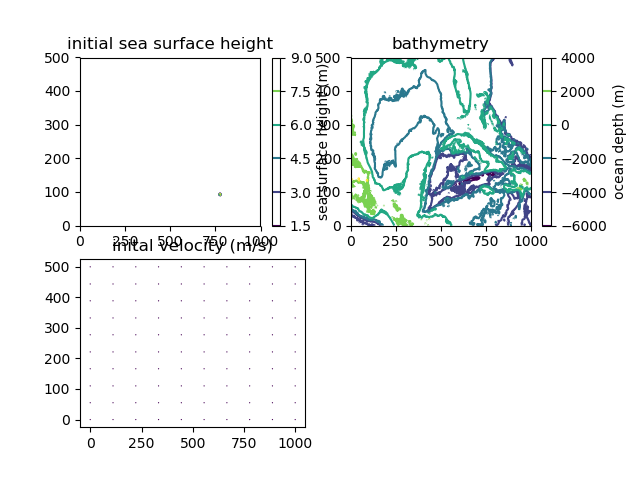

9.030645


In [47]:
plt.figure(95)

plt.subplot(221)
a1 = plt.contour(qp.asnumpy(caribb1692.n.T))
tt1 = plt.title('initial sea surface height')
cb1 = plt.colorbar()
cb1.set_label('sea surface height (m)')

plt.subplot(222)
a2 = plt.contour(-qp.asnumpy(caribb1692.h.T))
tt2 = plt.title('bathymetry')
cb2 = plt.colorbar()
cb2.set_label('ocean depth (m)')

plt.subplot(223)
a3 = vect(d_dx(caribb1692.u, caribb1692.dx), d_dy(caribb1692.v, caribb1692.dy))
tt3 = plt.title('inital velocity (m/s)')

print(np.max(caribb1692.n))

In [21]:
c1692sim = simulate(caribb1692, 2400)
cb1692dt, max1692, min1692 = c1692sim[:3]

simulated 2400 seconds


In [22]:
fig = plt.figure(101)
cb1692 = np.transpose(cb1692dt, (0, 2, 1))[:,::-1]
f = genframes(cb1692, frames=np.linspace(0, cb1692.shape[0]-1, 120, dtype=int))
anim = animation.ArtistAnimation(fig, f)
cb = plt.colorbar()
h = qp.asnumpy(caribb1692.h)
ht = np.transpose(h, (1, 0))[::-1,:]
coast = plt.contour(ht-20, colors='black', levels=1)

plt.figure(110)

plt.subplot(121)
plt.title('maximum')
plt.imshow(max1692+1, cmap='seismic', norm=mpl.colors.LogNorm())
plt.colorbar()
plt.contour(h, colors='black', levels=1)

plt.subplot(122)
plt.title('minimum')
plt.imshow(1-min1692, cmap='seismic', norm=mpl.colors.LogNorm())
plt.colorbar()
plt.contour(h, colors='black', levels=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>